In [1]:
# !pip install wordcloud --user
# !pip install nltk --user
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

%matplotlib inline

[nltk_data] Downloading package punkt to /home/andrew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# lendo datasets
depressives = pd.read_csv('depressives.csv', index_col=0)
random = pd.read_csv('random_tweets.csv', index_col=0)

In [3]:
depressives.head()

,tweet
1,Enquanto tratarem pessoas depressivas como dra...
2,"Minha dor hoje é tão intensa, que acho que a a..."
3,É complicado depender de pessoas ou de algo pa...
4,Pessoas mortas também costumam respirar
5,Uma clínica de reabilitação para mentes destru...


In [4]:
random.head()

,tweet
0,que agressiva gente
1,Chegou atrasado jornalista!!! Nós já sabíamos ...
2,pô é mó merda
3,Viés ideológico é o golpe.
4,@TiagoBrunet realiza meu sonho de ganha o seu...


In [5]:
# adicionando coluna de classificação
depressives['depressive'] = 1
random['depressive'] = 0
dataset = pd.concat([depressives, random])

In [6]:
# montando dataset de palavras com 618 mil tweets
df = pd.read_csv('dataset.csv', engine='python')
words = pd.concat([df['tweet'], dataset['tweet']])
word_embedding_dataset = pd.DataFrame(words)

In [7]:
dataset.head()

,tweet,depressive
1,Enquanto tratarem pessoas depressivas como dra...,1
2,"Minha dor hoje é tão intensa, que acho que a a...",1
3,É complicado depender de pessoas ou de algo pa...,1
4,Pessoas mortas também costumam respirar,1
5,Uma clínica de reabilitação para mentes destru...,1


In [8]:
stopwords = '''
de a o que e do da em um para é com não uma os no se na por mais as dos como mas foi ao ele das tem à seu sua ou ser 
quando muito há nos já está eu também só pelo pela até isso ela entre era depois sem mesmo aos ter seus quem nas me 
esse eles estão você tinha foram essa num nem suas meu às minha têm numa pelos elas havia seja qual será nós tenho lhe 
deles essas esses pelas este fosse dele tu te vocês vos lhes meus minhas teu tua teus tuas nosso nossa nossos nossas dela 
delas esta estes estas aquele aquela aqueles aquelas isto aquilo estou está estamos estão estive esteve estivemos
estiveram estava estávamos estavam estivera estivéramos esteja estejamos estejam estivesse estivéssemos estivessem
estiver estivermos estiverem hei há havemos hão houve houvemos houveram houvera houvéramos haja hajamos hajam houvesse
houvéssemos houvessem houver houvermos houverem houverei houverá houveremos houverão houveria houveríamos houveriam 
sou somos são era éramos eram fui foi fomos foram fora fôramos seja sejamos sejam fosse fôssemos fossem for  formos
forem serei será seremos serão seria seríamos seriam tenho tem temos tém tinha tínhamos tinham tive teve tivemos
tiveram tivera tivéramos tenha tenhamos tenham tivesse tivéssemos tivessem tiver tivermos tiverem terei terá 
teremos terão teria teríamos teriam pra O q https http A de
'''
stopwords = re.split(r'\W', stopwords)


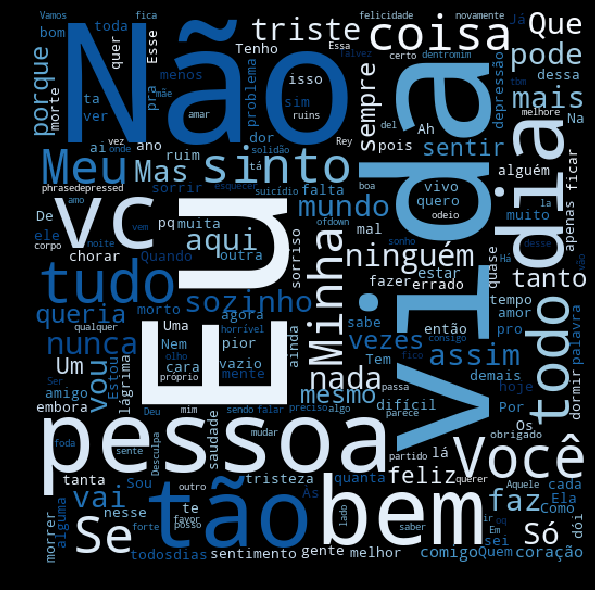

In [9]:
depressive_words = ' '.join(list(dataset[dataset['depressive'] == 1]['tweet']))
for word in stopwords:
    depressive_words = depressive_words.replace(' '+word+' ', '')
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

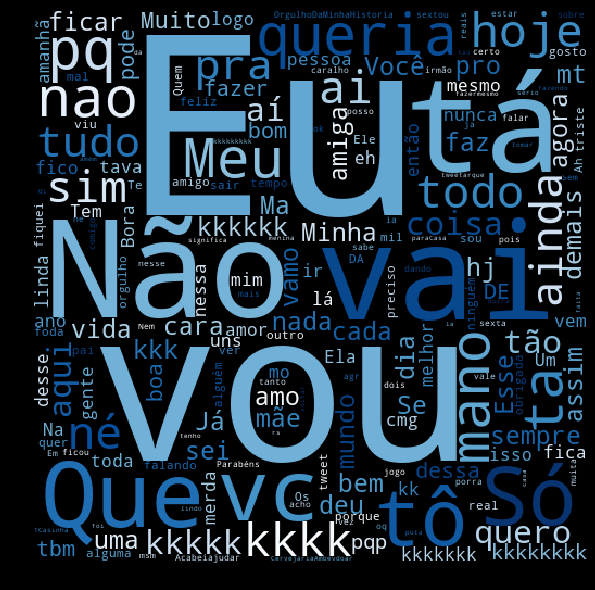

In [10]:
positive_words = ' '.join(list(dataset[dataset['depressive'] == 0]['tweet']))
for word in stopwords:
    positive_words = positive_words.replace(' '+word+' ', '')
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset['tweet'], dataset['depressive'], test_size=0.2)

In [12]:
import nltk
import string
from nltk.tokenize import word_tokenize

tweet_lines = list()
lines = word_embedding_dataset['tweet'].values.tolist()

for line in lines:   
    tokens = word_tokenize(str(line))
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    words = [w for w in words if not w in stopwords]
    tweet_lines.append(words)
len(tweet_lines)

618296

In [13]:
import gensim 
# Creating the model and setting values for the various parameters

EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=tweet_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=5)
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 46436


In [14]:
filename = 'tweets_embedding_word2vec.txt'

In [15]:

#model.wv.save_word2vec_format(filename, binary=False)

In [16]:
# carrega modelo treinado previamente
# model = gensim.models.KeyedVectors.load_word2vec_format(filename)
model.wv.most_similar('pão')

[('queijo', 0.910599946975708),
 ('frango', 0.8886984586715698),
 ('arroz', 0.880189836025238),
 ('pao', 0.8762598037719727),
 ('leite', 0.8643391132354736),
 ('alho', 0.8549949526786804),
 ('suco', 0.8507777452468872),
 ('coxinha', 0.848774790763855),
 ('macarrão', 0.8454458117485046),
 ('molho', 0.8430979251861572)]

In [17]:
tweet_lines = list()
lines = dataset['tweet'].values.tolist()

for line in lines:   
    tokens = word_tokenize(str(line))
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    words = [w for w in words if not w in stopwords]
    tweet_lines.append(words)
len(tweet_lines)

8893

In [18]:
import os

embeddings_index = {}
f = open(os.path.join('', 'tweets_embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [19]:
max_length = 100 # try other options like mean of sentence lengths

In [20]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

tweet_pad = pad_sequences(sequences, maxlen=max_length)
sentiment =  dataset['depressive'].values
print('Shape of tweet tensor:', tweet_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

# split the data into a training set and a validation set
indices = np.arange(tweet_pad.shape[0])
np.random.shuffle(indices)
tweet_pad = tweet_pad[indices]
sentiment = sentiment[indices]
num_validation_samples = int(VALIDATION_SPLIT * tweet_pad.shape[0])

X_train_pad = tweet_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = tweet_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

Found 11138 unique tokens.
Shape of tweet tensor: (8893, 100)
Shape of sentiment tensor: (8893,)


In [21]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (7115, 100)
Shape of y_train tensor: (7115,)
Shape of X_test_pad tensor: (1778, 100)
Shape of y_test tensor: (1778,)


In [22]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, GlobalMaxPooling1D

# define model
model = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model.add(embedding_layer)
# Convolutional Layer

model.add(Dropout(0.2))

model.add(Conv1D(filters=250, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())


# LSTM Layer
# model.add(LSTM(300))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X_train_pad, y_train, batch_size=30, epochs=20, validation_data=(X_test_pad, y_test), verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1113900   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 250)          75250     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 250)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 1,189,401
Trainable params: 75,501
Non-trainable params: 1,113,900
_____________________________________________________________

In [24]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test, batch_size=128)
print('Accuracy: %f' % (accuracy*100))

1778/1778 [==============================] - 1s 468us/step
Accuracy: 82.958380


In [25]:

#Let us test some  samples
# load the dataset but only keep the top n words, zero the rest

test_sample_1 = "eu não sinto tanta vontade de viver"
test_sample_2 = "o céu tá lindo"


test_samples = [test_sample_1, test_sample_2]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=100)

#predict
model.predict(x=test_samples_tokens_pad)


array([[0.997488  ],
       [0.00122223]], dtype=float32)

In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
user = pd.read_csv('user_test/renejuniioor.csv')
len(user)

638

In [28]:
def tweet_classifier(tweet):
    test_samples_tokens = tokenizer_obj.texts_to_sequences(tweet)
    test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=100)

    #predict
    return model.predict(x=test_samples_tokens_pad)[0][0]


In [29]:
user = user[~user.tweet.str.contains('bit.')]
len(user)

633

In [30]:
lista = []
for tweet in user['tweet']:
    lista.append(tweet_classifier(tweet))

In [31]:
user['prediction'] = lista

In [32]:
"{} tweets desse usuário demonstram tendencias de depressão".format(len(user[user['prediction'] < 0.70]))

'530 tweets desse usuário demonstram tendencias de depressão'

In [33]:
for row in user[user['prediction'] > 0.70].values:
    print(row[1])

se eu souber que fizeram qualquer gracinha com ele não vou perdoar.. vai dar merda
sono💤 cade??
independente de ganhar ou perde eu tenho certeza absoluta que eu estarei com sono :/
Caraca agora to pensando igual louco aqui... Pra que onde ela vai me levar hmmm
Cara eu sou um merda
Crlh eu to muito bolado com tudo.... Vou encher a cara hoje é que se foda, amanha vou pra escola ruim mesmo
Caguei pra vida namoral
Crlh eu to muitoooooo ruim
Crlh to muito ruim, espero que sobre tempo pra eu reservar la o paintball com os mlks
Cara eu odeio gente que só escuta Linkin Park e Skillet e fala que entende tudo de rock😡😡😡 aí toma no cu
Se você não entende a dor das pessoas ao seu redor, vc nunca entenderá a sua própria dor.
Sabe quando você tem a impressão que a pessoa está te olhando, aí vc olha pra ela e ela fica pensando que ce ta bizoiando ela? Chatao isso😒😒
Cara eu odeio pessoas que querem se mostrar melhores que as outras 😡😡
Crlh o João é foda... Me fez aceita uma missão ae kkkk
Concordo da 